In [114]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import math
import json

In [115]:
#Importing the Lens table

t = Table.read('paperII_table1.fits', format='fits')

GalRa = t['RAJ2000'].tolist()
GalDec = t['DEJ2000'].tolist() 

NewGalRa = []
NewGalDec = []

#Converting from H:M:S and D:M:S to degrees

for i in range(len(GalRa)):
    
    x = list(map(int, GalRa[i].split()))
    y = list(map(int, GalDec[i].split()))
    
    xDeg = (x[0]*15) + (x[1]*0.25) + (x[2]*0.004166)
    
    if x[0] < 0:
        yDeg = -(y[2]/3600) - (y[1]/60) + y[0]
    else:
        yDeg = -(y[2]/3600) - (y[1]/60) + y[0]
    
    NewGalRa.append(xDeg)
    NewGalDec.append(yDeg)




In [130]:
#Importing the FRB table

df = pd.read_csv('chimefrbcat1.csv')

FRBra = df['ra'].tolist();
FRBdec = df['dec'].tolist();
FRBname = df['tns_name'].tolist()

In [140]:
#Importing the Repeating FRB table

'''
with open('repeaters.json') as json_file:
    data = json.load(json_file)
    
print(data['190907.J08+46']['ra'])

'''

#Table with repeating FRB IDs

#FRB_Rep_ID = ['FRB20180916B', 'FRB20181119A', 'FRB20190208A', 'FRB20190303A', 'FRB20201124A', 'FRB20200120E', 
              #'FRB20190417A', 'FRB20190212A', 'FRB20180814A', '190907.J08+46', 'FRB20181030A', 'FRB20190117A', 
              #'FRB20180908B', 'FRB20190604A', 'FRB20181128A', 'FRB20190213A', 'FRB20190222A', 'FRB20181017A', 
              #'FRB20190209A', 'FRB20190116B' ]

Rep_FRBra = ['01 58 00', '12 42 00', '18 55 00', '13 53 00', '05 08 00', '09 57 00', '19 39 00', '18 24 00', '04 22 00', '08 09 00', '10 54 00', '22 07 00', '12 32 00', '14 35 00', '04 56 00', '02 14 00', '20 52 00', '17 05 00', '09 37 00', '12 49 00']
Rep_FRBdec = ['65 44 00', '65 08 00', '46 58 00', '48 15 00', '26 03 00', '68 49 00', '59 24 00', '81 26 00', '73 40 00', '46 16 00', '73 44 00', '17 23 00', '74 12 00', '53 17 00', '63 23 00', '20 04 00', '69 50 00', '68 17 00', '77 40 00', '27 09 00']

new_Rep_FRBra = []
new_Rep_FRBdec = []

for i in range(len(Rep_FRBra)):
    
    x = list(map(int, Rep_FRBra[i].split()))
    y = list(map(int, Rep_FRBdec[i].split()))
    
    xDeg = (x[0]*15) + (x[1]*0.25) + (x[2]*0.004166)
    
    if x[0] < 0:
        yDeg = -(y[2]/3600) - (y[1]/60) + y[0]
    else:
        yDeg = -(y[2]/3600) - (y[1]/60) + y[0]
    
    new_Rep_FRBra.append(xDeg)
    new_Rep_FRBdec.append(yDeg)
    
print(new_Rep_FRBra)

[29.5, 190.5, 283.75, 208.25, 77.0, 149.25, 294.75, 276.0, 65.5, 122.25, 163.5, 331.75, 188.0, 218.75, 74.0, 33.5, 313.0, 256.25, 144.25, 192.25]


In [136]:
'''

for i in range(len(FRB_Rep_ID)): #20
    
    for j in range(len(FRBname)): #300
        
        if (FRB_Rep_ID[i] == FRBname[j]): 
            
            Rep_FRBra.append(FRBra[j])
            Rep_FRBdec.append(FRBdec[j]) #21
            FRB_name_test.append(FRBname[j])
            
print(Rep_FRBdec)
print(FRB_name_test)

'''

[65.7167542, 65.13, 46.96, 46.96, 46.96, 46.96, 48.24, 59.4, 81.43, 73.63, 73.79, 17.37, 74.19, 53.28, 63.22, 63.22, 20.08, 69.83, 68.28, 77.67, 27.15]
['FRB20180916B', 'FRB20181119A', 'FRB20190208A', 'FRB20190208A', 'FRB20190208A', 'FRB20190208A', 'FRB20190303A', 'FRB20190417A', 'FRB20190212A', 'FRB20180814A', 'FRB20181030A', 'FRB20190117A', 'FRB20180908B', 'FRB20190604A', 'FRB20181128A', 'FRB20181128A', 'FRB20190213A', 'FRB20190222A', 'FRB20181017A', 'FRB20190209A', 'FRB20190116B']


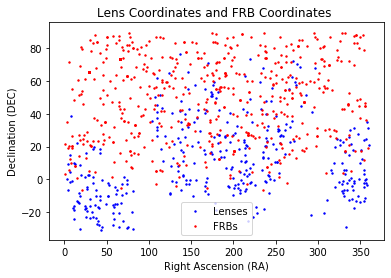

In [105]:
#Showing both FRB and Galaxies (Full Area)

plt.title("Lens Coordinates and FRB Coordinates ")

gal = plt.scatter(NewGalRa, NewGalDec, s=2, c='b') #Lens
frb = plt.scatter(FRBra, FRBdec, s=2, c='r') #FRB
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')

#rect = mpatches.Rectangle((110, 0), 140, 50, fill=False, color="purple", linewidth=2)
#plt.gca().add_patch(rect)

plt.legend((gal, frb), ('Lenses', 'FRBs'),loc='best', fontsize=10)

plt.show()



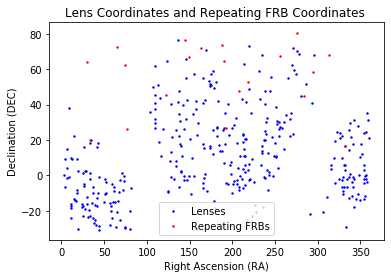

In [142]:
#Showing both Repeating FRBs and Galaxies (Full Area)

plt.title("Lens Coordinates and Repeating FRB Coordinates ")

gal = plt.scatter(NewGalRa, NewGalDec, s=2, c='b') #Lens
frb = plt.scatter(new_Rep_FRBra, new_Rep_FRBdec, s=2, c='r') #FRB
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')

#rect = mpatches.Rectangle((110, 0), 140, 50, fill=False, color="purple", linewidth=2)
#plt.gca().add_patch(rect)

plt.legend((gal, frb), ('Lenses', 'Repeating FRBs'),loc='lower center', fontsize=10)

plt.show()


In [106]:
def Density (Type, ListRa, ListDec, left, right, bottom, top): 
    
    NumberOfElements = 0
    
    for i in range(len(ListRa)): 
        
        if (ListRa[i] >= left) and (ListRa[i] <= right) and (ListDec[i] >= bottom) and (ListDec[i] <= top): 
            
            NumberOfElements += 1
            
    print("Number of " + Type + " in Rectangle: " + str(NumberOfElements))
    
    density = NumberOfElements
    
    return density

In [107]:
# converts cartesian coordinates into spherical only returning theta and phi seperately
#returns them in radians 

def Get_Theta (Ra, Dec): 
    
    cord = SkyCoord(ra=Ra*u.degree, dec=Dec*u.degree, frame='icrs')
    
    raHour = cord.ra.hms[0]
    raMin = cord.ra.hms[1]
    raSec = cord.ra.hms[2]
    decMin = cord.dec.hms[1]
    decSec = cord.dec.hms[2]
    
    #decRadians = Dec * (np.pi/180)
    
    a = (raHour * 15) + (raMin * 0.25) + (raSec * 0.004166)
    
    if Dec < 0: 
        b = (np.absolute(Dec)) + (decMin/60) + (decSec/3600) * -(Dec) #needs negative sign
    else:
        b = (np.absolute(Dec)) + (decMin/60) + (decSec/3600) * (Dec)
        
    c = 1 #we don't care about distance?
    
    #-----------------------------------------------------------------------------------------
    
    ar = a * (np.pi/180) #in radians for numpy.sin or cos
    br = b * (np.pi/180)
    
    x = (c * np.cos(br)) * np.cos(ar)
    y = (c * np.cos(br)) * np.sin(ar)
    z = c * np.sin(br)
    
    theta = np.arctan2(y, x)
    
    return theta #in radians

def Get_Phi (Ra, Dec): 
    
    cord = SkyCoord(ra=Ra*u.degree, dec=Dec*u.degree, frame='icrs')
    
    raHour = cord.ra.hms[0]
    raMin = cord.ra.hms[1]
    raSec = cord.ra.hms[2]
    decMin = cord.dec.hms[1]
    decSec = cord.dec.hms[2]
    
    #decRadians = Dec * (np.pi/180)
    
    a = (raHour * 15) + (raMin * 0.25) + (raSec * 0.004166)
    
    if Dec < 0: 
        b = (np.absolute(Dec)) + (decMin/60) + (decSec/3600) * -(Dec) #needs negative sign
    else:
        b = (np.absolute(Dec)) + (decMin/60) + (decSec/3600) * (Dec)
        
    c = 1 #we don't care about distance?
    
    #-----------------------------------------------------------------------------------------
    
    ar = a * (np.pi/180) #in radians for numpy.sin or cos
    br = b * (np.pi/180)
    
    x = (c * np.cos(br)) * np.cos(ar)
    y = (c * np.cos(br)) * np.sin(ar)
    z = c * np.sin(br)
    
    
    val = (x**2)*(y**2)
    
    temp1 = np.sqrt(val)
    temp2 = z
    
    phi = np.arctan2(temp1, temp2)
    
    return phi #in radians

In [108]:
print(Get_Theta(175, 0))
print(Get_Phi(175, 0))

3.0543261909900776
1.5707963267948966


In [151]:
def Coincidence_Probability (FRB_Ra_List, FRB_Dec_List, left, right, bottom, top): 
    
    #Visual Representation
    
    plt.title("Lens Coordinates and FRB Coordinates ")

    plt.scatter(NewGalRa, NewGalDec, s=2, c='b') #Lens
    plt.scatter(FRB_Ra_List, FRB_Dec_List, s=2, c='r') #FRB
    plt.xlabel('Ra')
    plt.ylabel('Dec')
    
    width = right - left
    height = top - bottom

    rect = mpatches.Rectangle((left, bottom), width, height, fill=False, color="purple", linewidth=2)
    plt.gca().add_patch(rect)
    
    plt.legend((gal, frb), ('Lenses', 'FRBs'),loc='lower center', fontsize=10)

    plt.show()
    
    #Finding Solid Angle (Area)
    #N = top   S = bottom   E = right   W = left
    
    PhiN = Get_Phi(left + width/2, top)
    PhiS = Get_Phi(left + width/2, bottom)
    
    ThetaE = Get_Theta(right, bottom + height/2)
    ThetaW = Get_Theta(left, bottom + height/2)
    
    Area = np.abs((np.sin(PhiN) - np.sin(PhiS)) * (ThetaE - ThetaW)) #in steradians
    
    #Finding Density of Lens and FRB
    
    FRB_Density = Density("FRB", FRB_Ra_List, FRB_Dec_List, left, right, bottom, top) / Area
    
    Lens_Density = Density("Lens", NewGalRa, NewGalDec, left, right, bottom, top) / Area
    
    #Finding Tolerance Area
    
    tolerance = 0.7  #degrees (constant)
    # if used as rectangle, side length = 2 * r 
    
    t_area = (2 * tolerance)**2 * (math.pi / 180)**2
    
    #Formula d1 * d2  * Overlap Area
    
    print("")
    print("FRB Density: " + str(FRB_Density))
    print("Lens Density: " + str(Lens_Density))
    print("Overlap Area: " + str(Area))
    print("Tolerance Area: " + str(t_area))
    print("")
    
    Probability = FRB_Density * Lens_Density * Area * t_area
    
    print("Coincidence Probabilty: " + str(Probability))
    
    return Probability


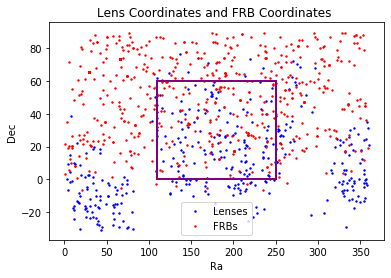

Number of FRB in Rectangle: 139
Number of Lens in Rectangle: 116

FRB Density: 36.20051523781112
Lens Density: 30.21050192507978
Overlap Area: 3.8397243543875237
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 2.507168643815768


2.507168643815768

In [152]:
Coincidence_Probability (FRBra, FRBdec, 110, 250, 0, 60)

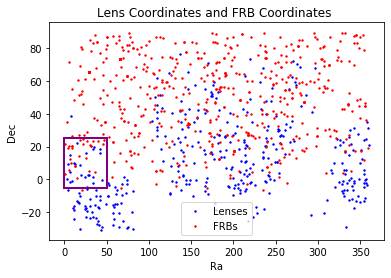

Number of FRB in Rectangle: 28
Number of Lens in Rectangle: 23

FRB Density: 81.34391880756708
Lens Density: 66.81821902050153
Overlap Area: 0.34421749542505786
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 1.1170271617855267


1.1170271617855267

In [153]:
Coincidence_Probability (FRBra, FRBdec, 0, 50, -5, 25)

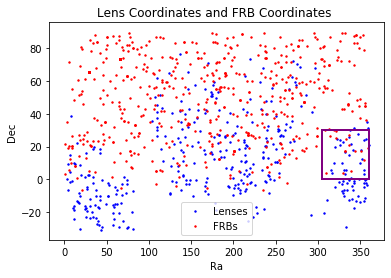

Number of FRB in Rectangle: 17
Number of Lens in Rectangle: 30

FRB Density: 37.16340318546234
Lens Density: 65.58247620963942
Overlap Area: 0.4574392693576054
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 0.6656524553443024


0.6656524553443024

In [154]:
Coincidence_Probability (FRBra, FRBdec, 305, 360, 0, 30)

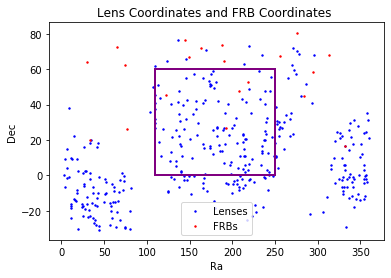

Number of FRB in Rectangle: 4
Number of Lens in Rectangle: 116

FRB Density: 1.0417414456924061
Lens Density: 30.21050192507978
Overlap Area: 3.8397243543875237
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 0.07214873795153287


0.07214873795153287

In [155]:
Coincidence_Probability (new_Rep_FRBra, new_Rep_FRBdec, 110, 250, 0, 60)

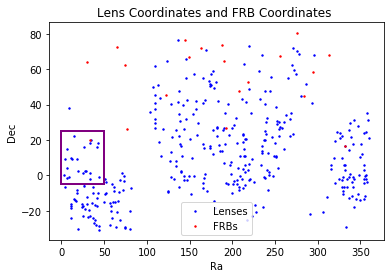

Number of FRB in Rectangle: 1
Number of Lens in Rectangle: 23

FRB Density: 2.9051399574131103
Lens Density: 66.81821902050153
Overlap Area: 0.34421749542505786
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 0.03989382720662596


0.03989382720662596

In [156]:
Coincidence_Probability (new_Rep_FRBra, new_Rep_FRBdec, 0, 50, -5, 25)

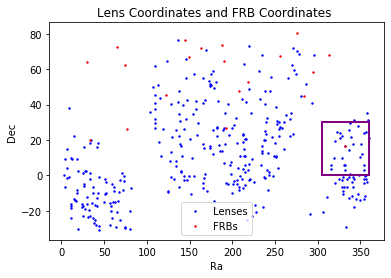

Number of FRB in Rectangle: 1
Number of Lens in Rectangle: 30

FRB Density: 2.186082540321314
Lens Density: 65.58247620963942
Overlap Area: 0.4574392693576054
Tolerance Area: 0.0005970501427819487

Coincidence Probabilty: 0.03915602678495897


0.03915602678495897

In [157]:
Coincidence_Probability (new_Rep_FRBra, new_Rep_FRBdec, 305, 360, 0, 30)

Total Coincidence Probability



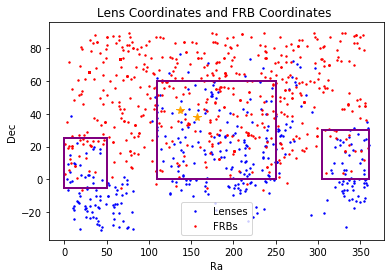

'\n\nprint("Number of FRB total: " + str(Number_of_FRB))\nprint("Number of Lens total: " + str(Number_of_Lens))\nprint("")\nprint("FRB Density: " + str(FRB_Dens))\nprint("Lens Density: " + str(Lens_Dens))\nprint("Overlap Area: " + str(Total_Area))\nprint("")\nprint("Coincidence Probabilty: " + str(CP))\n\n'

In [178]:

#Total Coincidence Probability

print("Total Coincidence Probability")
print("")

Number_of_FRB = 139 + 28 + 17
FRB_Dens = (1 / Number_of_FRB)

Number_of_Lens = 116 + 23 + 30
Lens_Dens = (1 / Number_of_Lens)

Total_Area = 8400 + 1500 + 1650

CP =  FRB_Dens * Lens_Dens * Total_Area


plt.title("Lens Coordinates and FRB Coordinates ")

plt.scatter(NewGalRa, NewGalDec, s=2, c='b') #Lens
plt.scatter(FRBra, FRBdec, s=2, c='r') #FRB
plt.plot(137.2, 42, marker='*', markersize=8, color='orange')
plt.plot(157.2, 38.28, marker='*', markersize=8, color='orange')
plt.xlabel('Ra')
plt.ylabel('Dec')

rect1 = mpatches.Rectangle((110, 0), 140, 60, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect1)

rect2 = mpatches.Rectangle((305, 0), 55, 30, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect2)

rect3 = mpatches.Rectangle((0, -5), 50, 30, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect3)

plt.legend((gal, frb), ('Lenses', 'FRBs'),loc='lower center', fontsize=10)

plt.show()

'''

print("Number of FRB total: " + str(Number_of_FRB))
print("Number of Lens total: " + str(Number_of_Lens))
print("")
print("FRB Density: " + str(FRB_Dens))
print("Lens Density: " + str(Lens_Dens))
print("Overlap Area: " + str(Total_Area))
print("")
print("Coincidence Probabilty: " + str(CP))

'''

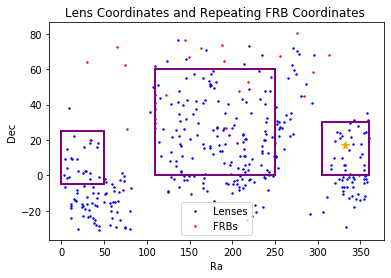

In [175]:
plt.title("Lens Coordinates and Repeating FRB Coordinates ")

plt.scatter(NewGalRa, NewGalDec, s=2, c='b') #Lens
plt.scatter(new_Rep_FRBra, new_Rep_FRBdec, s=2, c='r') #FRB
plt.plot(331.7, 17.4, marker='*', markersize=8, color='orange')
plt.xlabel('Ra')
plt.ylabel('Dec')

rect1 = mpatches.Rectangle((110, 0), 140, 60, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect1)

rect2 = mpatches.Rectangle((305, 0), 55, 30, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect2)

rect3 = mpatches.Rectangle((0, -5), 50, 30, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect3)

plt.legend((gal, frb), ('Lenses', 'FRBs'),loc='lower center', fontsize=10)

plt.show()

In [ ]:
#need to highlight the 3 candidates on the plot